# Загрузка Pandas и очистка данных

## В задачи пректа входит:

 - Удалить из датафрейма столбцы, данные в которых представлены не числами (это вы уже сделали, и нужно просто повторить знакомые действия, но в этот раз выполнить данный шаг в последнюю очередь).
 - Избавиться от пропущенных (None) значений (на предыдущем шаге мы делали это самым грубым из всех возможных способов; сейчас попробуем подойти к процессу более гибко).
 - Создать новые столбцы с данными, используя для этого информацию, содержащуюся в других столбцах датафрейма (например, можно добавить столбец, сообщающий, сколько дней прошло со дня публикации последнего отзыва, отображённого на сайте).

## Описание датасета
Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

 - **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
 - **City** — город, в котором находится ресторан;
 - **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
 - **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
 - **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
 - **Price Range** — диапазон цен в ресторане;
 - **Number of Reviews** — количество отзывов о ресторане;
 - **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
 - **URL_TA** — URL страницы ресторана на TripAdvosor;
 - **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.



In [32]:
# импорт библиотек
import pandas as pd
import numpy as np
import scipy
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [89]:
# функции используемые в ноутбуке
def pre_process(df):
    pass

def features_combination(features_list):
    pass

In [34]:
# установка параметров
%pylab inline

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 30) # выведем больше колонок

path = './Preproject3_data/'

Populating the interactive namespace from numpy and matplotlib


C:\Users\Samsung\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['style']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [35]:
# чтение данных
df = pd.read_csv(f'{path}main_task.xlt')

### Ознакомление с данными

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [37]:
for col in df.columns: print('{:20} {}'.format(col, type(df.loc[0][col])))

Restaurant_id        <class 'str'>
City                 <class 'str'>
Cuisine Style        <class 'str'>
Ranking              <class 'numpy.float64'>
Rating               <class 'numpy.float64'>
Price Range          <class 'str'>
Number of Reviews    <class 'numpy.float64'>
Reviews              <class 'str'>
URL_TA               <class 'str'>
ID_TA                <class 'str'>


In [38]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


Пропуски в явном виде `(NaN)` наблюдаются в трех признаках: Cuisine Style, Price Range и Number of Reviews. Кроме трех числовых признаков Ranking, Rating и Number of Reviews (один из ни - целевая переменная) признаки представлены строками.

In [39]:
# изменеие имен колонок для возможности обращения к колонкам как к атрибутам df
df.columns = df.columns.str.replace(' ','_')

In [40]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

## Работа с признаками

Сначала рассмотрим существующие признаки, примем решение о способе их предобработки, извлечем из признаков информацию для создания новых признаков. Предобработаем существующие признаки применив функцию. После этого создадим новые, при нелбходимости предобработаем и их.

### Restaurant_id
Согласно описанию - идентификационный номер ресторана / сети ресторанов   

Посмотрим на значения признака

In [41]:
df.Restaurant_id.head()

0    id_5569
1    id_1535
2     id_352
3    id_3456
4     id_615
Name: Restaurant_id, dtype: object

Значения признака строковые, формата **'id_ЧИСЛО'**, где **ЧИСЛО** - некоторое целое число.
Проверим, все ли значения выглядит подобным образом, для этого убедимся что первые три символа везде **'id_'** и что все значения после первых 3-х симвлов содержат только цифры:

In [42]:
(df.Restaurant_id.str[:3] == 'id_').all(), df.Restaurant_id.str[3:].str.isnumeric().all()

(True, True)

Всё так и есть. Можно отбросить первые три символа(они везде одинаковые и потому не несут никакой информации) и в качестве значения признака принять приведенное к числовому виду **ЧИСЛО**:

Сопоставление `Restaurant id` с другими признаками из набора данных показало что как правило `Ranking` и **ЧИСЛО** в `Restaurant id` либо совпадают с точностью до 1 либо очень близки (возможно **ЧИСЛО** это `Ranking` в момент внесения ресторана в набор данных). Это наблюдение делает информативным казалось бы бесполезный признак, он будет впоследствии использован для создания новых.

Пропусков в признаке нет.

### City
Согласно описанию - город, в котором находится ресторан   

Посмотрим на значения признака и заодно проверим, если пропускив неявном виде:

In [43]:
df.City.unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

Пропусков, выбросов нет. Остается привести признак в числовой вид, применив dummy-кодирование.

### Cuisine_Style
согласно описанию - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане.  

Посмотрим как устроен признак:

In [44]:
df.Cuisine_Style.head()

0              ['European', 'French', 'International']
1                                                  NaN
2    ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                  NaN
4    ['German', 'Central European', 'Vegetarian Fri...
Name: Cuisine_Style, dtype: object

Заполним пропуски в признаке строковым значением *['Nan_Style']* и затем преобразуем текстовое представление списков в списки.

После чего мы создадим dummy-признаки по значениям в списках полученных из строковых значений в `Cuisine_Style` 

### Ranking
Согласно описанию - место, которое занимает данный ресторан среди всех ресторанов своего города

Признак числовой.  
Пропусков нет

В каждом городе разное количество ресторанов, поэтому и диапозон `Ranking` в каждом городе различный (что приводит к тому что наихудший ресторан в маленьком городе будет иметь такой же `Ranking` как и отличный ресторан в мегаполисе). Такая разница масштабов может помешать модели, имеет смысл отнормировать  Ranking в каждом городе отдельно, что мы и сделаем. 

Так же можно использовать как оценку количества ресторанов в городе максимальную величину `Ranking` для каждого города. Эта величина будет использована как самостоятельный признак и будет участвовать в создании других новых признаков.

Сохраним оценку количества ресторанов в городе, она нам понадобится при создании новых признаков.

In [45]:
num_rest_estimate = df.groupby('City').Ranking.max() 

### Price_Range
Согласно описанию - диапазон цен в ресторане   

Посмотрим на значения признака:

In [46]:
df.Price_Range.unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

Заполним пропуски строковым значением 'no range'и затем приведем признак к числовому виду, закодировав каждый из четырех вариантов значений соответствующим числом от 0 (для 'no range') до 3 (для высокого ценового диапзона)

### Number_of_Reviews
Согласно описанию - количество отзывов о ресторане  
**ИДЕИ: соотношение NoR с ранней датой, с номером в базе, бьется с отсутсвием Reviews? сравнить со средним количеством по городу.**

Признак в числовой форме.
Пропускив признаке есть:

In [47]:
df.Number_of_Reviews.isna().sum()

2543

Посмотрим на распределение признака у 0:

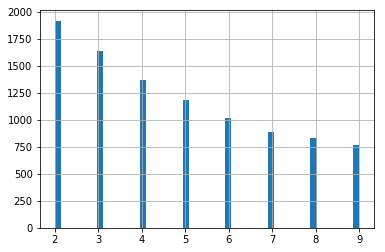

In [48]:
df['Number_of_Reviews'][df['Number_of_Reviews']<10].hist(bins = 50);

Если сопоставить количество пропусков и распределение, то возникает предположение, чо пропуски могут подразумевать значение 1. По крайней мере такая версия не испортит общий вид распределения. Заполним пропуски 1. Этим обработка признака и ограничится.

### ID_TA
Согласно описанию - идентификатор ресторана в базе данных TripAdvisor

Посмотрим на значения признака:

In [49]:
df.ID_TA[:5]

0    d1912643
1    d7992032
2    d8632781
3    d1358776
4    d6864963
Name: ID_TA, dtype: object

Значения признака строковые, формата **'dЧИСЛО'**, где **ЧИСЛО** - некоторое целое число. Проверим, все ли значения выглядит подобным образом, для этого убедимся что первый символ везде 'd' и что все символы кроме первого - только цифры:

In [50]:
(df.ID_TA.str[0] == 'd').all(), (df.ID_TA.str[1:].str.isnumeric()).all()

(True, True)

Обработаем признак -  примем в качесвте значения приведенную к числовому виду его цифровая часть (т.е. **ЧИСЛО**).  
В работе будет использоваться гипотеза о том что цифровая часть отражает хронологический порядок появления ресторана в базе данных. 

### Reviews
Согласно описанию - данные о двух отзывах, которые отображаются на сайте ресторана  
**ИДЕИ:дата раннего, дата позднего, срок от последнего отзыва до тоталпоследнего отзыва, соотносятся с ID_TA?  разброс в датах отзывов, наличие пропуска, тональность отзыва, длинна отзыва, грамматичнские ошибки в отзыве**

Посмотрим на значения признака:

In [51]:
df.Reviews[:5]

0    [['Good food at your doorstep', 'A good hotel ...
1    [['Unique cuisine', 'Delicious Nepalese food']...
2    [['Catch up with friends', 'Not exceptional'],...
3                                             [[], []]
4    [['Best place to try a Bavarian food', 'Nice b...
Name: Reviews, dtype: object

Признак строковый,в нем есть неявные пропуски (значения "[[], []]"), при работе с признаком надо будет учитывать их наличие. Удалять наблюдения с такими значениями не следует ввиду их значительного количества:

In [52]:
(df.Reviews == '[[], []]').sum()

6471

При обработке признака:
 - отделим и сохраним текстовую составляющую (собственно отзывы)
 - получим список дат отзывовов.   
 На основе этой информации позднее создадим новые признаки.

In [53]:
Review_texts = df.Reviews.apply(lambda x:x[: x.find('], [')+1]).str.replace("[\[\]]", "")

In [54]:
str_to_data = lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').date() # функция перевода str в datetime
today = datetime.datetime.today().date()
# Получим pd.Series содержащую списки дат отзывов
review_date_lists = df.Reviews.apply(lambda x:x[ x.find('], [')+3:]).str.replace("[\[\]' ]", "").str.split(",")

### URL_TA
Согласно описанию - URL страницы ресторана на TripAdvosor  

Посмотрим на значения признака:

In [55]:
for s in df.URL_TA[:5]: print(s)

/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html
/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html
/Restaurant_Review-g186338-d8632781-Reviews-ROKA_Mayfair-London_England.html
/Restaurant_Review-g187323-d1358776-Reviews-Esplanade-Berlin.html
/Restaurant_Review-g187309-d6864963-Reviews-Augustiner_Schutzen_Garten-Munich_Upper_Bavaria_Bavaria.html


Значения строковые, в строке присутсвует какойто индентификатор формата 'g123456', ID_TA, название ресторана, город/регион.  
Получим название и попытаемся такой признак обработать и применить.

In [56]:
rest_names = df.URL_TA.apply(lambda x: x[x.find('Reviews-')+8: x.find('-',x.find('Reviews-')+8)])

Вызывает любопытсво индентификатор формата 'g123456'. Вычленим его из `URL_TA`.

In [57]:
g_fig = df.URL_TA.apply(lambda x: int(x[x.find('-g')+2:x.find('-d')]))

К сожалению приходится признать что ни изучение распределения индентификатора, ни рассмотрение его уникальных значений не навело на какие-либо разумные предположения о его природе. Тем не менее  попробуем применить его в качестве фактора в нашей модели.

### Реализация предобработки.
Проведем кодирование существующих признаков в соотвтетсвии с принятыми решениями о способах предобработки.

In [58]:
df['Restaurant_id_enc'] = df.Restaurant_id.str[3:].astype(int)

df = pd.concat([df,pd.get_dummies(df.City)],axis=1)

df.Cuisine_Style = df.Cuisine_Style.fillna("['Nan_Style']").str[2:-2].str.split("', '")
cuisine_styles = sorted(set(df.Cuisine_Style.sum()))
for style in cuisine_styles:
    df[style] = df.Cuisine_Style.apply(lambda x: int(style in x))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
grouped_by_City = df.groupby('City')
for group in grouped_by_City.groups:
    index = grouped_by_City.groups[group]
    scaled_values = scaler.fit_transform(df[['Ranking']].loc[index])
    df.Ranking.loc[index] = pd.Series(scaled_values.flatten(), index=index)
    
price_range_encod = {'$': 1, '$$ - $$$': 2, '$$$$': 3, 'no range': 0}
df['Price_Range_enc'] = df.Price_Range.fillna('no range').map(price_range_encod)

df.Number_of_Reviews.fillna(1,inplace=True)

df.ID_TA = df.ID_TA.str[1:].astype(int)


C:\Users\Samsung\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Создание новых признаков

Новый признак `population` - население города, в которм расположен ресторан. Признак возможно интресен и сам по себе, но с большей вероятнотью интересен в сочетании с другими признаками.

In [59]:
population_dict = {
    'Paris':2140526, 'Stockholm':961609, 'London': 8787892, 'Berlin':3601131, 'Munich':1456039, 
    'Oporto':240000,'Milan':1366180, 'Bratislava': 425923, 'Vienna':1840573, 'Rome': 2872800, 
    'Barcelona':1620343, 'Madrid':3223334,'Dublin':553165, 'Brussels':1198726, 'Zurich': 428000, 
    'Warsaw':1758143, 'Budapest':1749734, 'Copenhagen':615993,'Amsterdam':859732, 'Lyon':515695, 
    'Hamburg':1830584, 'Lisbon':506654, 'Prague':1280508, 'Oslo':673469,'Helsinki':643272, 
    'Edinburgh':524900 ,'Geneva':499000, 'Ljubljana':258900, 'Athens':655780, 'Luxembourg':115227, 
    'Krakow':766739
}

df['City_population'] = df.City.map(population_dict)

Новый признак `styles_num` - количество стилей кухни, представленныхв ресторане.

In [60]:
df['styles_num'] = df.apply(lambda x: 0 if x.Nan_Style else len(x.Cuisine_Style),axis=1)

Новый признак `ranking_change` - определяется как ***Restaurant_id_enc - Ranking + 1***, где ***Restaurant_id_enc*** цифровая часть `Restaurant_id`, основан на предположении, что цифровая часть `Restaurant_id` определяется как `Ranking` в момент внесения в базу

In [61]:
df['ranking_change'] = df.Restaurant_id_enc - df.Ranking

Новый признак `num_rest_estimate` оценка количества ресторанов в городе (оценкой служит Ranking.max())

In [62]:
df['num_rest_estimate'] = df.apply(lambda x: num_rest_estimate[x.City], axis = 1)

Новый признак `rest_per_capita` -  оценочное (по Ranking.max()) количество ресторанов на душу населения.

In [63]:
df ['rest_per_capita'] = df.apply(lambda x: num_rest_estimate[x.City]/x.City_population, axis = 1)

Новый признак `reviews_per_capital` - количество отзывов а душу населения

In [64]:
df['reviews_per_capital']=df.Number_of_Reviews/df.City_population

Новый признак `since_review` - время прошедшее с даты последнего отзыва

In [65]:
df['since_review'] = review_date_lists.apply(lambda x: (today - str_to_data(x[-1])).days if x[-1] 
                                             else -999)

Новый признак `review_date_range` временной интервал между отзывами

In [66]:
df['review_date_range'] = review_date_lists.apply(lambda x: (str_to_data(x[0]) - str_to_data(x[1])).days if len(x) == 2 
                                                  else 0)

Новый признак `rank_dif` -  разница в рангах отранжированного по врмени первого отзыва и отранжированных по цифрой части ***ID_TA***, основат на предположении, что ***ID_TA*** заполнялся в хронологическом порядке и предположении, что чем дольше ресторан работает, тем раньше должен/может быть первый отзыв.

In [67]:
first_review = review_date_lists.apply(lambda x: str_to_data(x[0]) if x[0] else 0)
review_index = first_review[first_review !=0].sort_values().index

ID_TA_with_review = df.loc[review_index].ID_TA

review_rank_dict = {val: rank for rank, val in enumerate(sorted(first_review[review_index]))}
review_rank = first_review[review_index].map(review_rank_dict)

ID_TA_rank_dict = {val: rank for rank, val in enumerate(sorted(ID_TA_with_review))}
ID_TA_rank = ID_TA_with_review.map(ID_TA_rank_dict)

df['rank_dif'] = ID_TA_rank - review_rank
df.rank_dif.fillna(0, inplace=True)

Новый признак `rank_dif_NoR` - разница в рангах отранжированного количества отзывов ***Number_of_Reviews*** и отранжированных по цифрой части ***ID_TA***, основан на предположении, что ***ID_TA*** заполнялся в хронологическом порядке и предположении, что чем дольше ресторан работает, тем больше должно быть отзывов.

In [68]:
NoR_index = df.Number_of_Reviews[df.Number_of_Reviews != 0].index

ID_TA_with_NoR = df.loc[NoR_index].ID_TA

NoR_rank_dict = {val: rank for rank, val in enumerate(sorted(df.Number_of_Reviews[NoR_index],reverse=True))}
NoR_rank = df.Number_of_Reviews[NoR_index].map(NoR_rank_dict)

ID_TA_NoR_rank_dict = {val: rank for rank, val in enumerate(sorted(ID_TA_with_NoR))}
ID_TA_NoR_rank = ID_TA_with_NoR.map(ID_TA_NoR_rank_dict)

df['rank_dif_NoR'] = ID_TA_NoR_rank - NoR_rank
df.rank_dif_NoR.fillna(0, inplace=True)

Новый признак `rev_text_length` - длинна извлеченного из `Reviews` текста отзыва(-ов).

In [69]:
df['rev_text_length'] = Review_texts.apply(len)

Новый признак `rev_on_website` - количество отзывов на сайте, согласно признаку `Reviews`

In [70]:
df['rev_on_website'] = Review_texts.apply(lambda x: len(x.split(', ')) if x else 0)

Новый признак `punct_in_review` - бинарный признак наличия/отсутствия знаков пунктуации в тектсе отзыва(-ов)

In [71]:
punct = "!;:?.,"
df['punct_in_review'] = Review_texts.apply(lambda x: int(bool(set(list(punct)) & set(list(x.replace(', ',''))))))

Новый признак `prop_num_range` - отношение количества отзывов вообще к временному интервалу между отзывами на сайте

In [72]:
df['prop_num_range'] =  (df.Number_of_Reviews/df.review_date_range.abs()).fillna(0).replace(np.inf, 10**6)

Новый признак `g_fig` - значения индентификатора из признака `URL_TA`

In [73]:
df['g_fig'] =  g_fig

### ПРОВЕРКА

In [76]:
coltodrop = ['City', 'Reviews', 'URL_TA', 'Price_Range','Cuisine_Style']

In [77]:
dffm = df.drop(columns=coltodrop)

In [78]:
dffm.dtypes[dffm.dtypes == object]

Restaurant_id    object
dtype: object

In [79]:
dffm.isna().sum().sum()

0

In [80]:
dffm.shape

(40000, 179)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [81]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = dffm.drop(['Restaurant_id', 'Rating'], axis = 1)
y = dffm['Rating']

In [82]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [83]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [84]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [85]:
%%time
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

Wall time: 1min 19s


In [86]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20128349999999998


MAE: 0.232775, MAE: 0.22765649999999996,  MAE: 0.21642549999999997, MAE: 0.209511
MAE: 0.20496099999999998, MAE: 0.20267699999999997, 
MAE: 0.199917 rank_dif  
MAE: 0.20157899999999998 rank_dif_NoR  
MAE: 0.19952899999999998   
MAE: 0.20308449999999997 prop_num_range  
MAE: 0.20128349999999998 g_fig


## Вот по каким критериям проект будет оценивать ментор:

 - Качество кода (ясность, соответствие стандартам оформления pep-8, наличие комментариев).
 - Наличие визуализации с выводами (корреляция и важность признаков).
 - Feature Engineering и обогащение датасета (4 - наличие редких/уникальных предикторов модели).
 - Работа с метрикой МАЕ.
 - Использование внешних источников данных.

# ПОДВАЛ